<a href="https://colab.research.google.com/github/rtajeong/AI_Cluster_SEAT/blob/main/gg_51_ARIMA%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%98%EC%97%AC_%EC%8B%9C%EA%B3%84%EC%97%B4_%EC%98%88%EC%B8%A1_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 슈퍼마켓 매출 예측
- 가구 세일 데이터 사용


In [19]:
# !curl -L https://tabsoft.co/2Y1P8oC -o Superstore.xls

- you can download the data from https://vizlab.tistory.com/122.
- about 3.2 MB (If size causes problems, you can convert it to a .csv file.)

In [20]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [21]:
df = pd.read_excel("Superstore.xls")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [22]:
df.shape

(9994, 21)

In [23]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [24]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

- 가구(Furniture)의 매출액만 보겠다
- 상품 Category가 Furniture인 항목만 선택한다.

In [25]:
furniture = df.loc[df['Category'] == 'Furniture']

In [26]:
furniture.shape

(2121, 21)

In [27]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2015-01-06 00:00:00'), Timestamp('2018-12-30 00:00:00'))

- 4년간의 데이터가 들어 있는 것을 알 수 있다.

In [28]:
# cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID',
#         'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
#         'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
#         'Quantity', 'Discount', 'Profit']
# furniture.drop(cols, axis=1, inplace=True)


- 주문 날짜(Order Date), 판매량(Sales) : 두 column만 사용
- 날짜 순으로 정렬
- 결측치가 있는지 확인

In [29]:
furniture = furniture[["Order Date", "Sales"]]
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

- 주문 날짜를 index로 지정

In [30]:
furniture = furniture.set_index('Order Date')
furniture.shape

(2121, 1)

In [31]:
furniture[:5]

,Sales
Order Date,
2015-01-06,2573.820
2015-01-07,76.728
2015-01-10,51.940
2015-01-11,9.940
2015-01-13,545.940


### 월별 통계로 전환

#### 시계열 데이터 다루기
- https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/

##### resample 연산
- 시간 간격을 재조정하는 리샘플링(resampling)
- 시간 구간이 작아지면 데이터 양이 증가 : 업-샘플링(up-sampling)
- 시간 구간이 커지면 데이터 양이 감소 : 다운-샘플링(down-sampling)
    - 다운-샘플링의 경우, 원래의 데이터가 그룹으로 묶이기 때문에 그룹바이(groupby)때와 같이 그룹 연산을 해서 대표값을 구해야 한다.
    - MS : 각 달의 첫날
    - 5T:5분, 1H:1시간, D(일), W(주), M(달), Y(년)
    - BM(평일 각 달의 마지막날, 주말 제외), BMS(평일 각 달의 첫날, 주말 제외)

In [32]:
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01    346.488318
2017-02-01    206.607947
2017-03-01    312.221756
2017-04-01    377.488286
2017-05-01    351.624070
2017-06-01    343.962421
2017-07-01    335.090231
2017-08-01    430.456286
2017-09-01    328.468445
2017-10-01    247.345354
2017-11-01    392.390479
2017-12-01    436.651369
2018-01-01    248.501333
2018-02-01    264.089900
2018-03-01    286.669600
2018-04-01    206.044502
2018-05-01    319.953928
2018-06-01    372.717386
2018-07-01    227.173500
2018-08-01    395.945487
2018-09-01    349.737422
2018-10-01    308.226313
2018-11-01    374.310253
2018-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

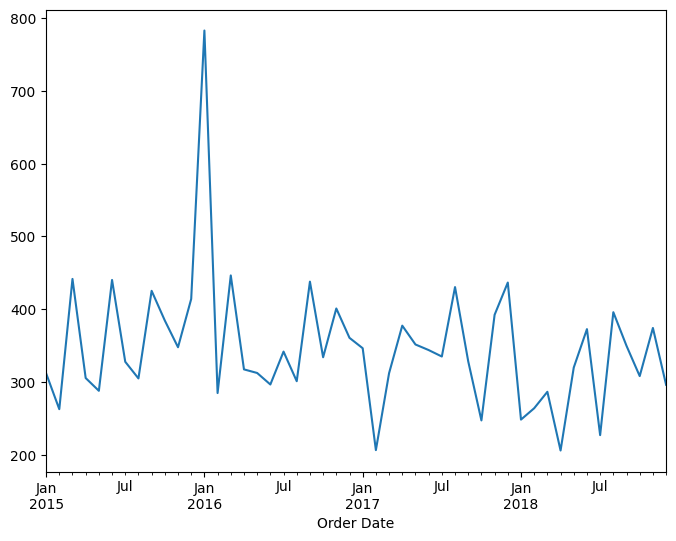

In [33]:
y.plot(figsize=(8, 6))
plt.show()

## ARIMA (판매량) 예측
### 데이터 분해
- seasonality, trend and noise: ARIMA(p, d, q):

- seasonal_decompose()
    - Seasonal decomposition using moving averages
    - Return : A object with seasonal, trend, and resid attributes.
    - The additive model is Y[t] = T[t] + S[t] + e[t]

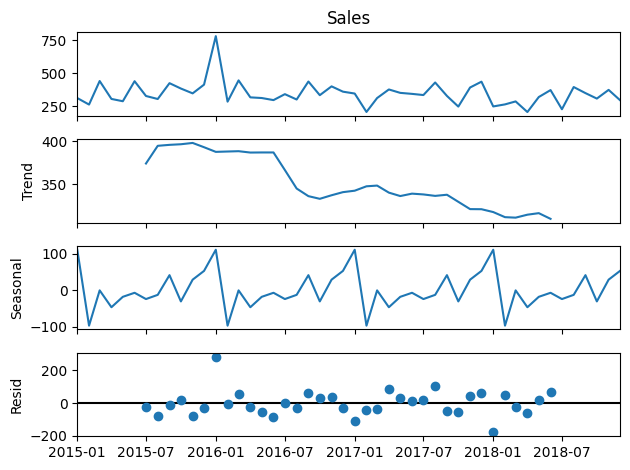

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

- itertools.product(p, d, q)
    - 곱집합(Cartesian product)
    - 예시) 두 스트링 'ABCD', 'xy' 의 곱집합 : Ax Ay Bx By Cx Cy Dx Dy

In [35]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

In [36]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [37]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [38]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

**굵은 텍스트**파라미터 선택

### Seasonal ARIMA 모형 추정

### SARIMAX
- The SARIMA model is specified (p,d,q)×(P,D,Q)s.
- enforce_stationarity
    - Whether or not to transform the AR parameters to enforce stationarity in the autoregressive component of the model. Default is True.
    - the model automatically applies differencing (d parameter in SARIMA) to achieve stationarity before fitting. Setting it to False allows fitting without differencing if the data already seems stationary.

- enforce_invertibility
    - Whether or not to transform the MA parameters to enforce invertibility in the moving average component of the model. Default is True.
    - When set to True (default), the model automatically adjusts the MA parameters if necessary to guarantee invertibility. Setting it to False allows non-invertible models, but may lead to unreliable forecasts and unexpected behavior.

- Using both enforce_stationarity and enforce_invertibility generally leads to more reliable and predictable models.
   - However, blindly enabling them may mask underlying issues in the data or hinder model flexibility.

### try / except
- https://wayhome25.github.io/python/2017/02/26/py-12-exception/

In [39]:
from statsmodels.tsa.statespace import sarimax

In [40]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sarimax.SARIMAX(y,
                                 order=param,
                                 seasonal_order=param_seasonal,
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:688.3112416991725
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1678.8552833792103
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:426.2046489859171
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:272.09198476282904


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501692
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1421.4751891323956
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.446456472235
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:274.09198456327925


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680666141
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2600.8176447991736
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.54964533646034


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:262.5230517047709
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.1584317342162


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2487.0595441045566
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.4464066250189


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:264.52300131281464
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:580.638926970597
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1334.2074580228548
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:433.3552136704604


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:274.106929574684
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:437.46040107889746
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1522.0063776784414
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:294.1158452476944


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:276.1053314166445
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:538.8964721447205
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1912.9319464368164


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:412.87269899052046
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:251.24707755083625
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:419.18397927249373


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:377.2577862539993
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:273.4032454636427


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:253.2196476462003
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:592.766149874985


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1077.4270307314714
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:427.72411597383274
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:273.582068437112
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:420.4114538992044


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1551.8637052851107
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:273.58403955659367
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:275.57843039613095
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:553.2719417804376
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2190.9453770699456
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:418.52617830891063


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:263.8216777113436
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:422.40035833220617


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:738.2951781920024
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:275.4775740530794
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:265.82121058756604
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:566.5211872508684
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1260.9043017895067
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:430.33057708179365


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:273.43213783258966
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:397.366898165161


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1411.1293415746327
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:273.441539879293
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:275.4127857749962
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:540.6257368397361
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1761.9991838953802


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:414.77261730418934
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:252.6613432747441
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:391.83032555438234


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2449.5960216796325
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:263.937108438127


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:254.6420713205906


In [41]:
results

SARIMAX(1, 1, 1)x(1, 1, 0, 12) yields the lowest AIC value of 263

In [42]:
from statsmodels.tsa.statespace import sarimax

mod = sarimax.SARIMAX(y,
                     order=(1, 1, 1),
                     seasonal_order=(1, 1, 0, 12),)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0160      0.261     -0.061      0.951      -0.527       0.496
ma.L1         -0.9941      2.606     -0.382      0.703      -6.101       4.113
ar.S.L12      -0.4843      0.079     -6.114      0.000      -0.640      -0.329
sigma2      1.252e+04   3.08e+04      0.406      0.685   -4.79e+04     7.3e+04


In [43]:
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, [], 12)   Log Likelihood                -218.301
Date:                             Mon, 22 Jan 2024   AIC                            444.602
Time:                                     13:20:05   BIC                            450.823
Sample:                                 01-01-2015   HQIC                           446.749
                                      - 12-01-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0160      0.261     -0.061      0.951      -0.527       0.496
ma.L1         -0.9941      

- ar.L1: AR coeffiient at lag 1
- ma.L1: the coefficient of the MA at lag 1
- ma.S.L12: seasonal autoregressive coefficient at lag 12
- sigma2: the estimated variance of the error term (also known as the white noise term) - difference between the observed values and the predicted values
- A smaller value of sigma2 indicates a better fit with less unexplained variance. In this case, 1.252e+04 (a large number) suggests that there is still a significant amount of unexplained variability in your model.

- null hypothesis (H0): there is no significant relationship or effect (specific parameter has no effect)
  - low p-value: reject H0 (he corresponding parameter is likely significant and has a non-zero effect on the response variable.) (good fit)
  - high p-value: weaker or non-significant relationship between the predictor variable and the response variable (i.e. bad fit)

### 모델의 동작을 확인하기 위한 모델 검사(model diagnostics) 수행
- 아래 결과를 보면 오차가 거의 정규분포를 따른다

### results.plot_diagnostics
- assessing the goodness-of-fit of the ARIMA model
- Diagnostic plots for standardized residuals of one endogenous variable
- Produces a 2x2 plot grid with the following plots (ordered clockwise from top left):
    1. Standardized residuals over time

    2. Histogram plus estimated density of standardized residulas, along with a Normal(0,1) density plotted for reference.

    3. Normal Q-Q plot, with Normal reference line.

    4. Correlogram (autocorrelation, 기준 : 현재 값)

In [ ]:
type(results)

statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper

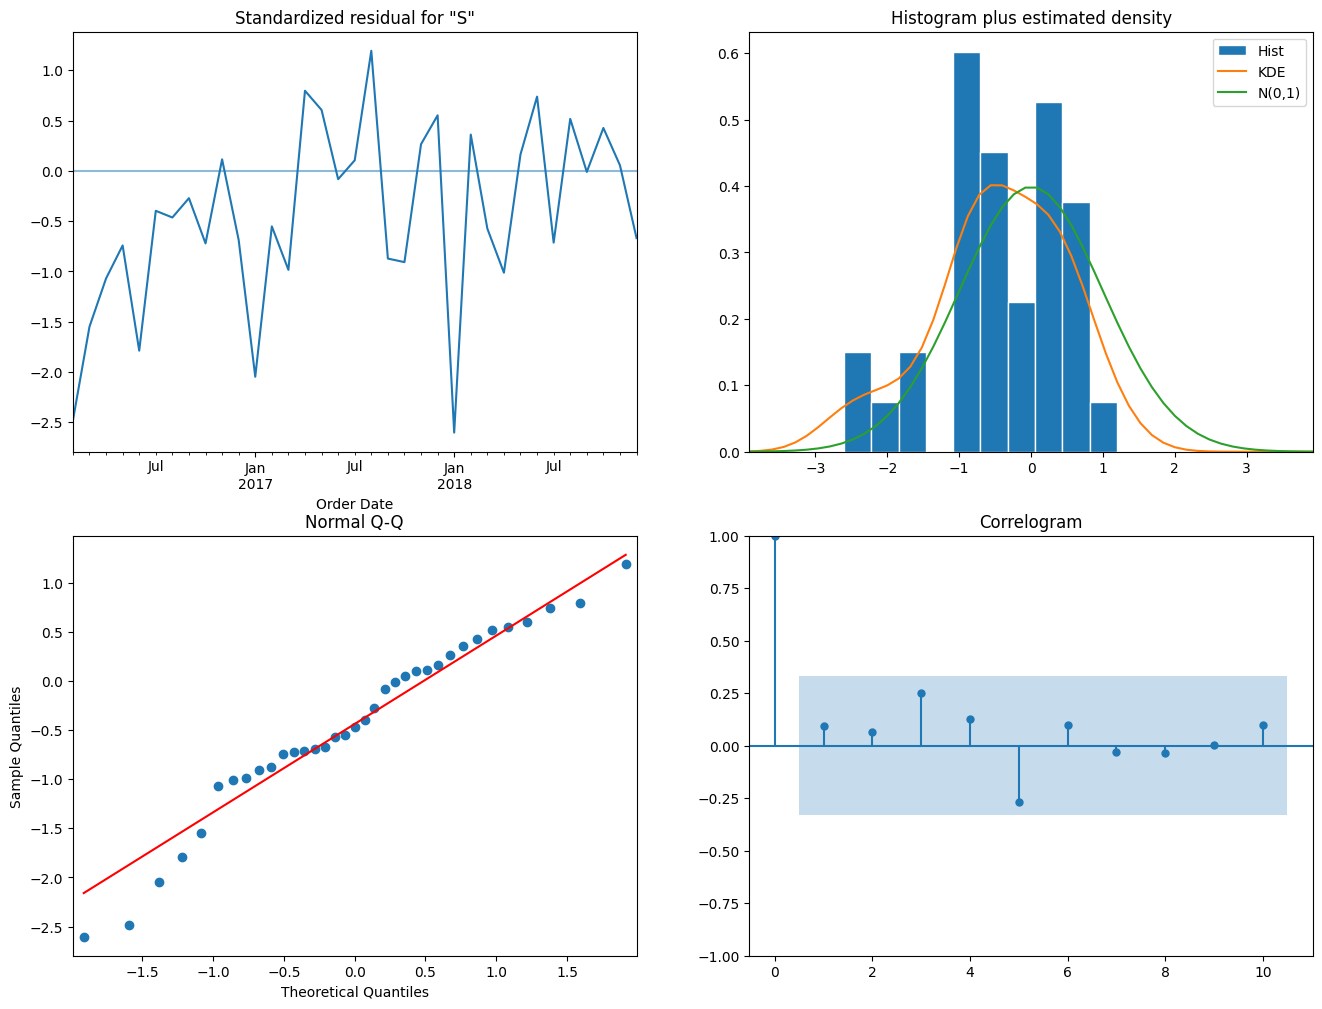

In [44]:
results.plot_diagnostics(figsize=(16, 12))
plt.show()

- The ACF shows the correlation between the residuals (model errors) at different lags (time steps). Ideally, we want the ACF to decay quickly and remain within the dashed confidence bands after lag 1. This indicates that the residuals are not significantly correlated with each other at larger lags, suggesting randomness and a good fit.
- Q-Q plot (quantile-quantile plot)
  - to assess the normality of the model's residuals
  - Theoretical quantities:
    - These are the quantiles of a theoretical normal distribution with a mean and standard deviation estimated from the data.
    - The quantiles represent the values that divide the theoretical distribution into equal probability sections. For example, the 0.25th quantile (Q1) would be the value below which 25% of the data points in the normal distribution fall.
  - Sample quantities:
    - These are the quantiles of the actual residuals generated by your ARIMA model.
    - They represent the values that divide the residuals into equal probability sections, similar to the theoretical quantiles.
  - Straight line: This represents the quantiles of a perfectly normal distribution based on the estimated mean and standard deviation of your residuals. Ideally, the points representing your actual residuals (sample quantities) would fall roughly along this line.
  - points:
    - Points close to the straight line: This indicates that the distribution of your residuals closely resembles a normal distribution, which is desirable for many statistical tests in ARIMA models.
    - Points deviating from the straight line: This suggests departures from normality, which could be due to: Missing seasonality, Non-linear relationships, Heteroscedasticity.

### 예측 수행

- pd.to_datetime() 함수를 쓰면
    - 날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후
    - DatetimeIndex 자료형 인덱스를 생성한다.

- get_prediction( , dynamic=False)
    - In-sample prediction and out-of-sample forecasting
    - dynamic
        - Integer offset relative to start at which to begin dynamic prediction.
        - Can also be an absolute date string to parse or a datetime type (these are not interpreted as offsets).

- conf_int(alpha=0.05)
    - Returns the confidence interval of the fitted parameters.
    - The significance level for the confidence interval. ie., The default alpha = .05 returns a 95% confidence interval.

- fill_between(x, y1, y2=0)
    - x : The x coordinates of the nodes defining the curves.
    - y1 : The y coordinates of the nodes defining the first curve.
    - y2 : The y coordinates of the nodes defining the second curve.(default: 0)

In [48]:
y['2014':]

Order Date
2015-01-01    312.126250
2015-02-01    262.808286
2015-03-01    441.635030
2015-04-01    305.570654
2015-05-01    288.032792
2015-06-01    440.204187
2015-07-01    327.910636
2015-08-01    305.014437
2015-09-01    425.294300
2015-10-01    384.507719
2015-11-01    347.820527
2015-12-01    414.134682
2016-01-01    782.662773
2016-02-01    284.943091
2016-03-01    446.420821
2016-04-01    317.445409
2016-05-01    312.498350
2016-06-01    296.699192
2016-07-01    341.860500
2016-08-01    301.206006
2016-09-01    437.883717
2016-10-01    334.072875
2016-11-01    401.049773
2016-12-01    360.715925
2017-01-01    346.488318
2017-02-01    206.607947
2017-03-01    312.221756
2017-04-01    377.488286
2017-05-01    351.624070
2017-06-01    343.962421
2017-07-01    335.090231
2017-08-01    430.456286
2017-09-01    328.468445
2017-10-01    247.345354
2017-11-01    392.390479
2017-12-01    436.651369
2018-01-01    248.501333
2018-02-01    264.089900
2018-03-01    286.669600
2018-04-01    

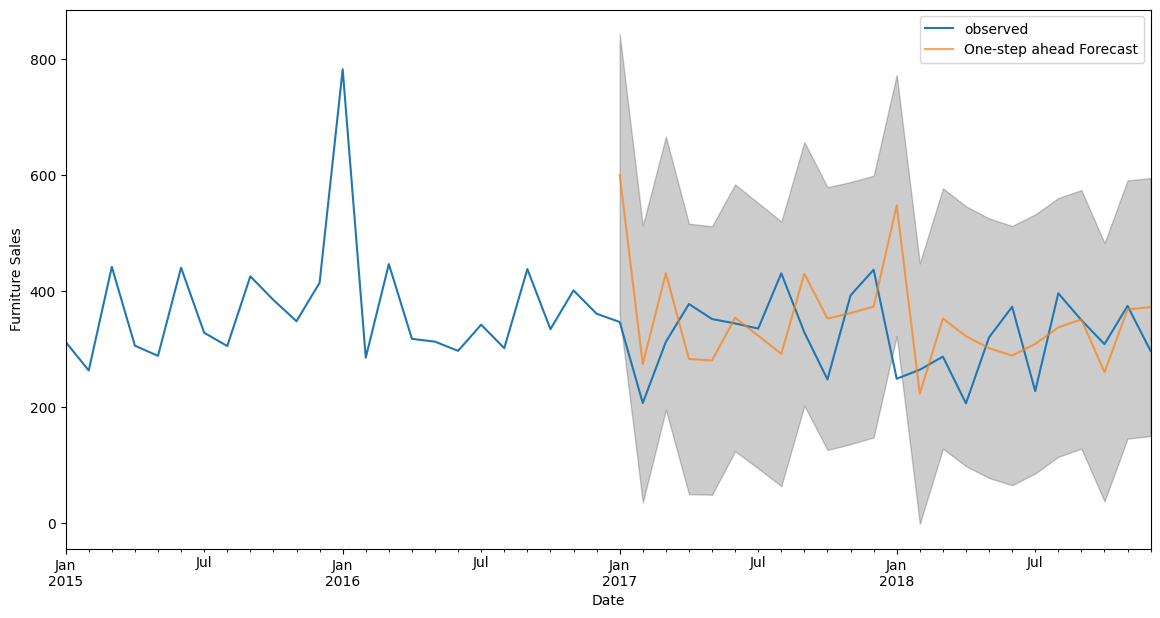

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
type(pred)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [49]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE is {}'.format(round(mse, 2)))

MSE is 11565.15


In [50]:
print('RMSE is {}'.format(round(np.sqrt(mse), 2)))

RMSE is 107.54


## 시간이 멀수록 confidence interval은 점차 증가하는 것을 볼 수 있다

- results.get_forecast()
    - Out-of-sample forecasts
    - steps : the number of steps to forecast from the end of the sample

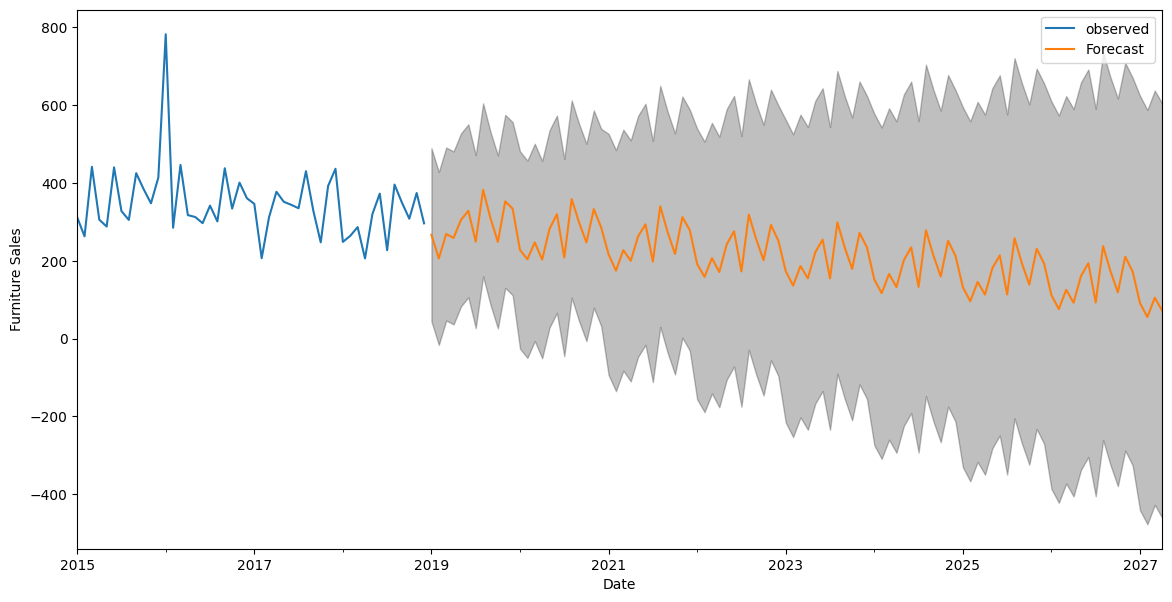

In [ ]:
pred_uc = results.get_forecast(steps=100)   # 끝에서 100 개월
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


### 다른 항목의 변화와 비교
- 가구 판매량 <-> 사무용품 판매량

In [51]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [ ]:
office[:3]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656


In [52]:
furniture[:3]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


### 가구와 사무용품의 월별 매출액 : DataFrame

In [53]:
furniture = furniture[['Order Date', 'Sales']]
office = office[['Order Date', 'Sales']]
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

In [54]:
furniture

,Order Date,Sales
7474,2015-01-06,2573.820
7660,2015-01-07,76.728
866,2015-01-10,51.940
716,2015-01-11,9.940
2978,2015-01-13,545.940
...,...,...
7636,2018-12-29,258.750
7632,2018-12-29,1207.840
5131,2018-12-29,101.120
7635,2018-12-29,300.980


In [55]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2015-01-06,2573.8200
1,2015-01-07,76.7280
2,2015-01-10,51.9400
3,2015-01-11,9.9400
4,2015-01-13,879.9390
...,...,...
884,2018-12-24,1393.4940
885,2018-12-25,832.4540
886,2018-12-28,551.2568
887,2018-12-29,2330.7180


In [ ]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

In [ ]:
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

In [ ]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

In [ ]:
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

In [ ]:
furniture.head()

,Order Date,Sales
0,2015-01-01,480.194231
1,2015-02-01,367.931600
2,2015-03-01,857.291529
3,2015-04-01,567.488357
4,2015-05-01,432.049188


In [ ]:
office.head()

,Order Date,Sales
0,2015-01-01,285.357647
1,2015-02-01,63.042588
2,2015-03-01,391.176318
3,2015-04-01,464.794750
4,2015-05-01,324.346545


- merge()
    - 두 데이터 프레임의 공통 열 혹은 인덱스를 기준으로 두 개의 테이블을 합친다.
    - 이 때 기준이 되는 열, 행의 데이터를 키(key)라고 한다(on=' ')
    - inner : 기본적으로는 양쪽 데이터프레임에 모두 키가 존재하는 데이터만 보여주는 inner join 방식을 사용한다
    - outer : 키 값이 한쪽에만 있어도 데이터를 보여준다.

In [ ]:
store = furniture.merge(office, how='inner', on='Order Date')
store.head()

,Order Date,Sales_x,Sales_y
0,2015-01-01,480.194231,285.357647
1,2015-02-01,367.931600,63.042588
2,2015-03-01,857.291529,391.176318
3,2015-04-01,567.488357,464.794750
4,2015-05-01,432.049188,324.346545


In [ ]:
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2015-01-01,480.194231,285.357647
1,2015-02-01,367.931600,63.042588
2,2015-03-01,857.291529,391.176318
3,2015-04-01,567.488357,464.794750
4,2015-05-01,432.049188,324.346545


In [ ]:
store.shape

(48, 3)

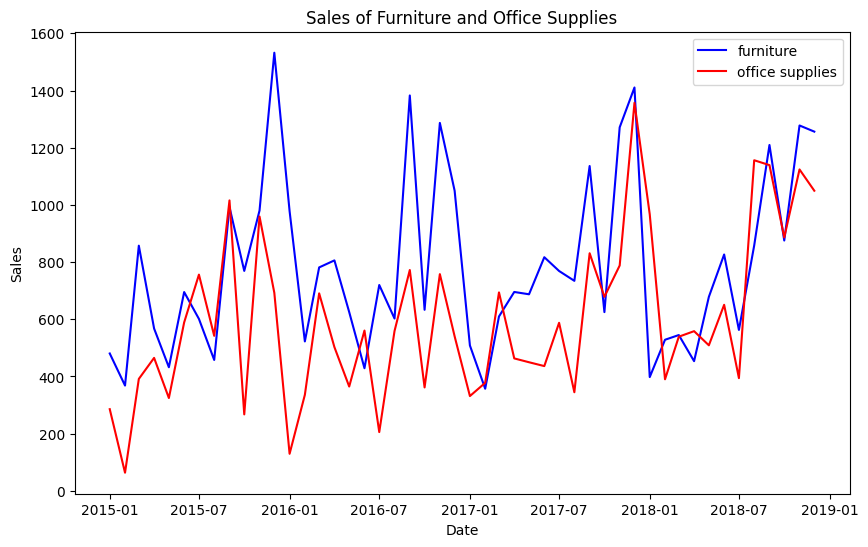

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales');
plt.title('Sales of Furniture and Office Supplies')
plt.legend();


- 유사한 계절적 특성을 갖는다.
- 사무용품 매출이 가구 매출을 앞지르는 시점을 찾아보겠다.

- np.where()
    - 조건식을 만족하는 index를 array 형태로 반환

In [ ]:
np.where(store['office_sales'] > store['furniture_sales'])

(array([ 6,  7,  8, 17, 25, 26, 33, 36, 39, 43, 45]),)

- 반환값이 2차원 배열로 되어있다

In [ ]:
np.where(store['office_sales'] > store['furniture_sales'])[0]

array([ 6,  7,  8, 17, 25, 26, 33, 36, 39, 43, 45])

In [ ]:
np.where(store['office_sales'] > store['furniture_sales'])[0][0]

6

In [ ]:
list(np.where(store['office_sales'] > store['furniture_sales'])[0])

[6, 7, 8, 17, 25, 26, 33, 36, 39, 43, 45]

In [ ]:
np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0]))

6

In [ ]:
type(store)

pandas.core.frame.DataFrame

In [ ]:
store.loc[6,'Order Date']

Timestamp('2015-07-01 00:00:00')

In [ ]:
first_date = store.loc[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("사무용품 매출이 가구매출을 앞지르는 시점: {}.".format(first_date.date()))

사무용품 매출이 가구매출을 앞지르는 시점: 2015-07-01.


## Prophet
- 페이스북에서 2017년 발표
- 시간 간격이 다른 샘플을 같이 분석 가능
- 휴일 등의 변수를 사용할 수 있다.
- 공식 사이트 : https://facebook.github.io/prophet/
- 논문 : https://peerj.com/preprints/3190.pdf
- 요약(한글) : https://gorakgarak.tistory.com/1255

- Install Error
``` python
!pip install fbprophet
```
- Anacond Prompt에서 OK!!!
``` python
conda install -c conda-forge fbprophet
```

In [57]:
from prophet import Prophet

In [58]:
furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfj3ojj73/epk2qmha.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfj3ojj73/vzgzc06l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4338', 'data', 'file=/tmp/tmpfj3ojj73/epk2qmha.json', 'init=/tmp/tmpfj3ojj73/vzgzc06l.json', 'output', 'file=/tmp/tmpfj3ojj73/prophet_model62ktri51/prophet_model-20240122141317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [60]:
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfj3ojj73/_n60kjmg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfj3ojj73/vtbigpax.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36507', 'data', 'file=/tmp/tmpfj3ojj73/_n60kjmg.json', 'init=/tmp/tmpfj3ojj73/vtbigpax.json', 'output', 'file=/tmp/tmpfj3ojj73/prophet_modelgszgx4h0/prophet_model-20240122141333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:13:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


- make_future_dataframe(periods=36, freq='MS')
    - Make dataframe with future dates for forecasting
    - periods : Int number of periods to forecast forward
    - freq : 'day', 'week', 'month', 'quarter', 'year', 1(1 sec), 60(1 minute) or 3600(1 hour)

In [61]:
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

In [62]:
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)

<Figure size 1800x600 with 0 Axes>

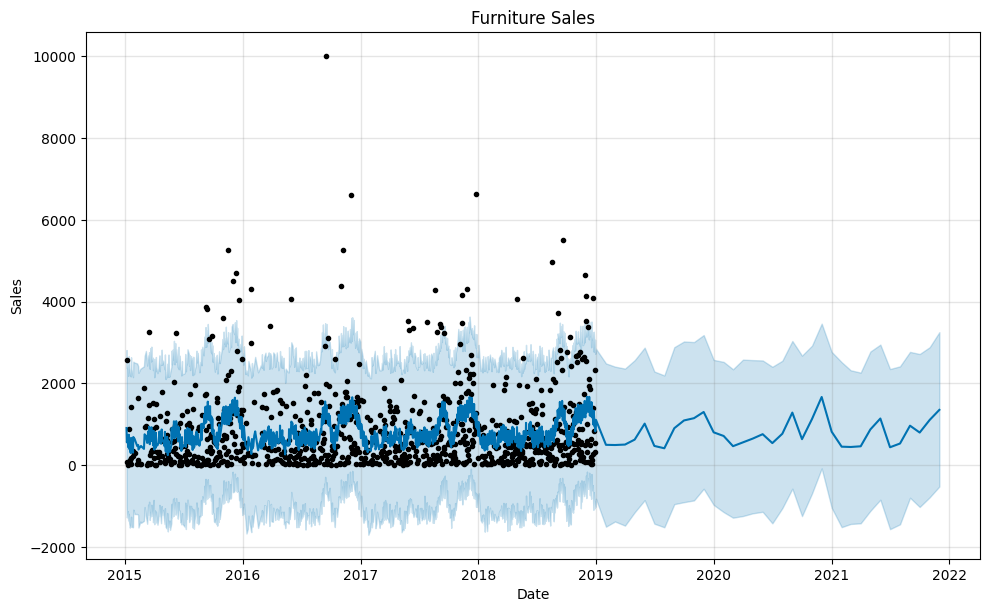

In [63]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1800x600 with 0 Axes>

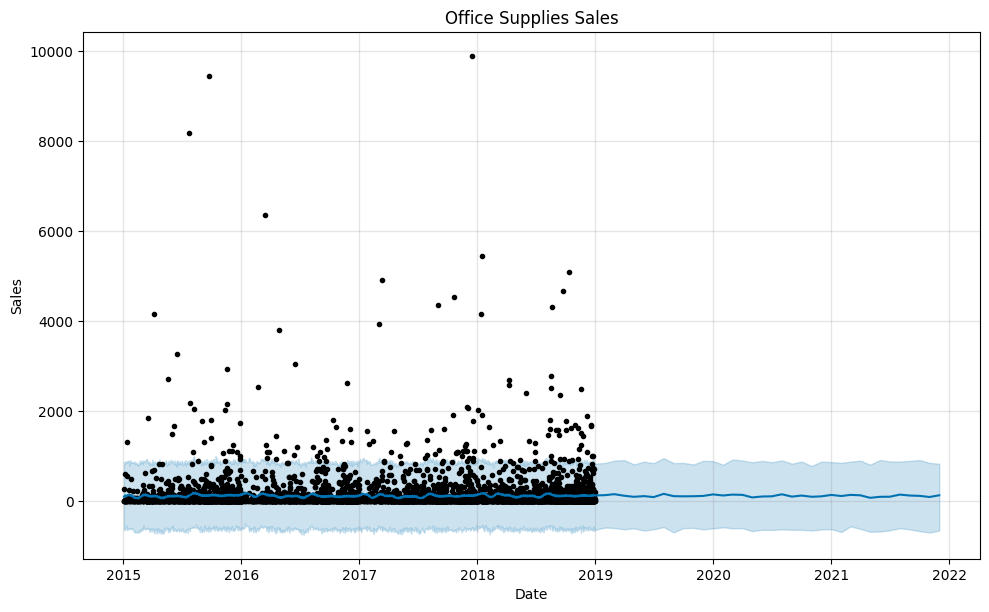

In [64]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');